<a href="https://colab.research.google.com/github/meghajadhav037/Elevate-Task-2-Megha-Jadhav/blob/main/Task2elevate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your Titanic CSV file...


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv
Dataset Loaded Successfully!

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- First 5 Rows ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2   

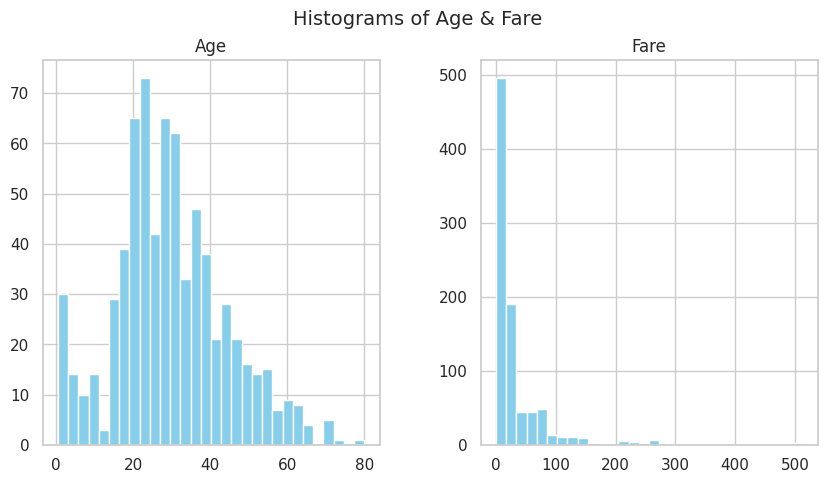

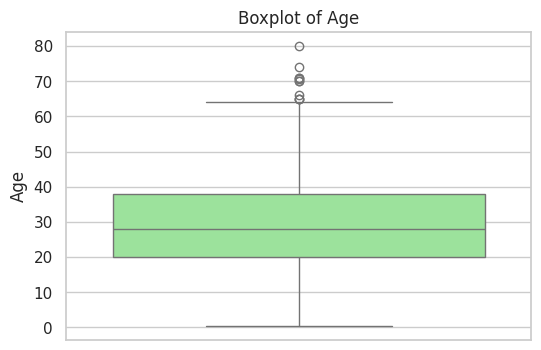

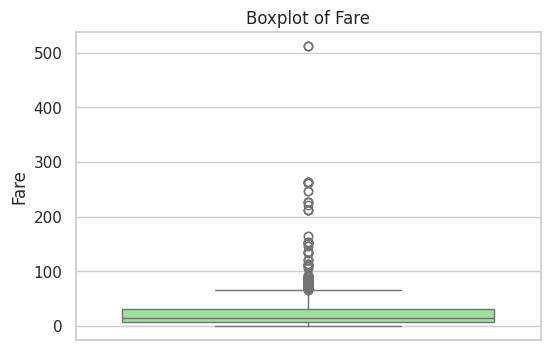

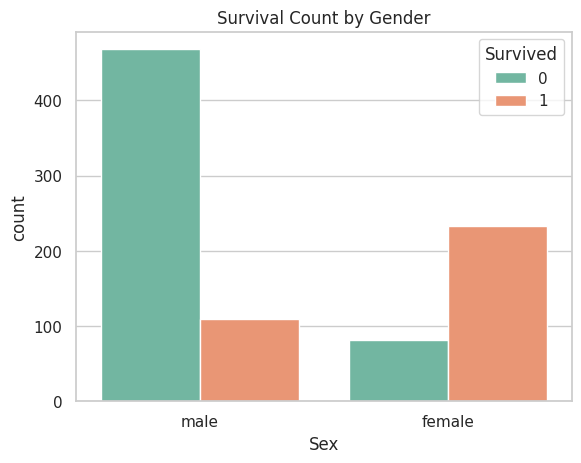

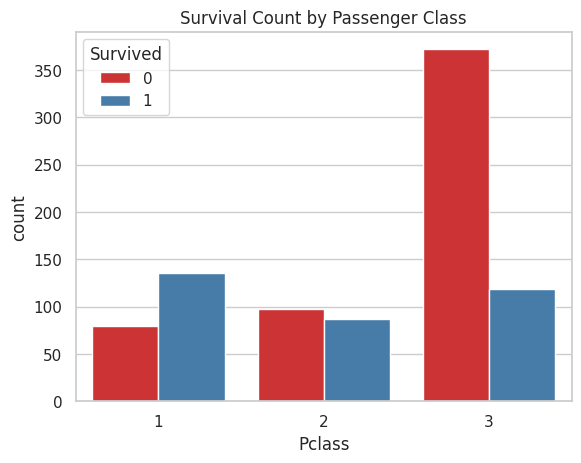

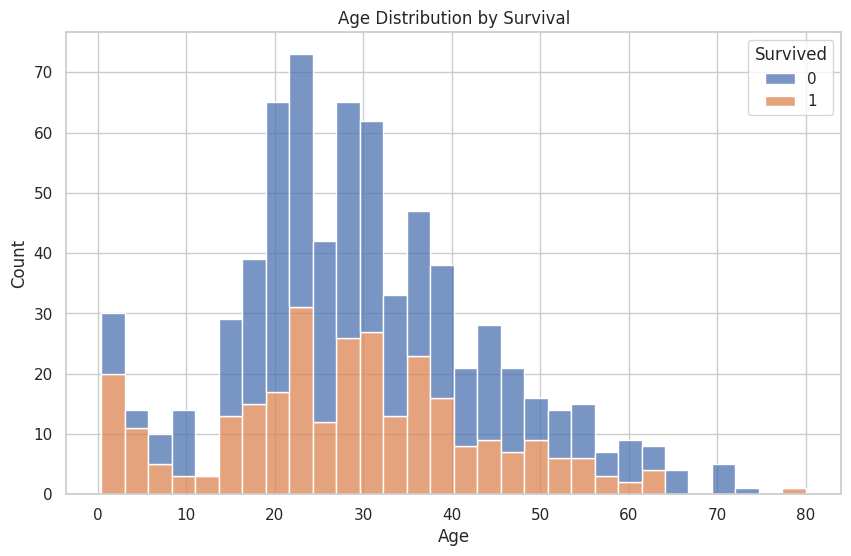

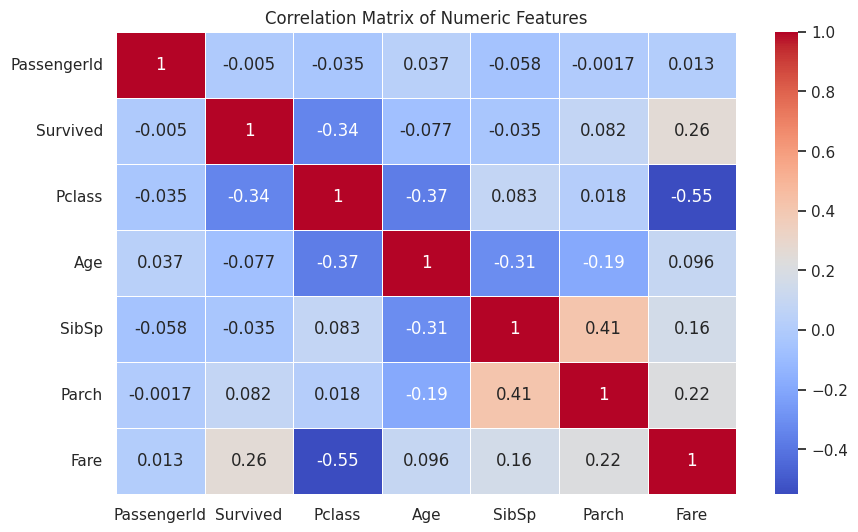

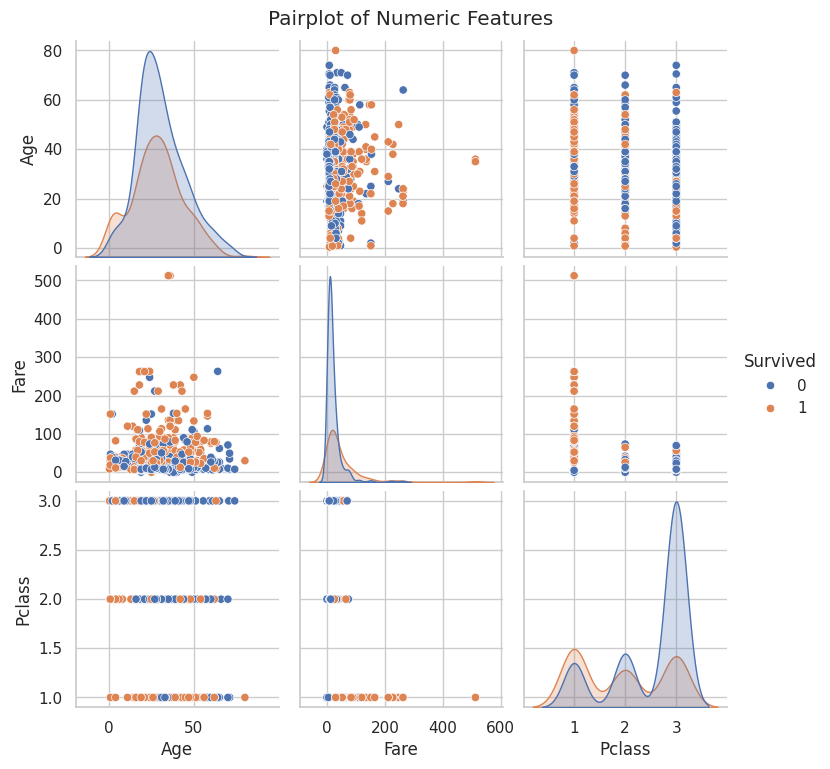


--- Skewness in Age & Fare ---
Age     0.389108
Fare    4.787317
dtype: float64

--- Checking Multicollinearity (Corr > 0.7) ---
             PassengerId  Survived  Pclass  Age  SibSp  Parch  Fare
PassengerId          NaN       NaN     NaN  NaN    NaN    NaN   NaN
Survived             NaN       NaN     NaN  NaN    NaN    NaN   NaN
Pclass               NaN       NaN     NaN  NaN    NaN    NaN   NaN
Age                  NaN       NaN     NaN  NaN    NaN    NaN   NaN
SibSp                NaN       NaN     NaN  NaN    NaN    NaN   NaN
Parch                NaN       NaN     NaN  NaN    NaN    NaN   NaN
Fare                 NaN       NaN     NaN  NaN    NaN    NaN   NaN

--- Key Insights ---
1. Female passengers had a much higher survival rate.
2. First-class passengers had better survival chances.
3. Age and Fare distributions are skewed and have outliers.
4. No major multicollinearity found in numeric features.
5. Strong visual patterns can guide feature selection in ML.

EDA Completed Su

In [3]:

# AI & ML INTERNSHIP PROJECT - TASK 2: EDA
# Dataset: Titanic Dataset (Upload from your system)
# Tools: Pandas, Seaborn, Matplotlib, Plotly

# ------------------ 1. Import Libraries ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

# ------------------ 2. Upload Dataset ------------------
print("Please upload your Titanic CSV file...")
uploaded = files.upload()

for fn in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[fn]))

print("Dataset Loaded Successfully!")

# ------------------ 3. Dataset Overview ------------------
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Missing Values ---")
print(df.isnull().sum())

# ------------------ 4. Summary Statistics ------------------
print("\n--- Summary Statistics ---")
print(df.describe(include='all'))

# ------------------ 5. Univariate Analysis ------------------

# Histograms
df[['Age', 'Fare']].hist(bins=30, figsize=(10, 5), color='skyblue')
plt.suptitle("Histograms of Age & Fare", fontsize=14)
plt.show()

# Boxplots
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.show()

# ------------------ 6. Bivariate Analysis ------------------

# Survival by Sex
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title("Survival Count by Gender")
plt.show()

# Survival by Pclass
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title("Survival Count by Passenger Class")
plt.show()

# Age vs Survival
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title("Age Distribution by Survival")
plt.show()

# ------------------ 7. Correlation Matrix ------------------

# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# Pairplot of selected features
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

# ------------------ 8. Skewness Detection ------------------
print("\n--- Skewness in Age & Fare ---")
print(df[['Age', 'Fare']].skew())

# ------------------ 9. Multicollinearity Check ------------------
print("\n--- Checking Multicollinearity (Corr > 0.7) ---")
corr_matrix = numeric_df.corr()
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix != 1.0)]
print(high_corr)

# ------------------ 10. Key Insights ------------------
print("\n--- Key Insights ---")
print("1. Female passengers had a much higher survival rate.")
print("2. First-class passengers had better survival chances.")
print("3. Age and Fare distributions are skewed and have outliers.")
print("4. No major multicollinearity found in numeric features.")
print("5. Strong visual patterns can guide feature selection in ML.")

print("\nEDA Completed Successfully! Ready for GitHub Submission.")